# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | hobyo
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | smithers
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | shingu
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | carutapera
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | barcelos
Processing Record 19 of Set 1 | tsiombe
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | guerrero ne

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)


                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    praia da vitoria  38.7333  -27.0667     16.14        67          20   
1           vorgashor  67.5833   63.9500    -24.98       100          98   
2               hobyo   5.3505   48.5268     24.69        74          91   
3             iqaluit  63.7506  -68.5145    -25.15        62          75   
4             stanley  54.8680   -1.6985     11.01        91          75   
..                ...      ...       ...       ...       ...         ...   
578           salalah  17.0151   54.0924     20.05        13           0   
579           haining  30.5363  120.6864      8.42        57          52   
580      vila do maio  15.1333  -23.2167     24.60        74         100   
581             ndele   8.4109   20.6473     21.83        29         100   
582      port douglas -16.4833  145.4667     30.33        64          65   

     Wind Speed Country        Date  
0         12.86      PT  1734485707  
1          

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,16.14,67,20,12.86,PT,1734485707
1,vorgashor,67.5833,63.9500,-24.98,100,98,3.11,RU,1734485708
2,hobyo,5.3505,48.5268,24.69,74,91,9.61,SO,1734485710
3,iqaluit,63.7506,-68.5145,-25.15,62,75,2.57,CA,1734485412
4,stanley,54.8680,-1.6985,11.01,91,75,7.72,GB,1734485631


In [12]:
import os

# Step 1: Create the 'output_data' directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)  # exist_ok=True prevents errors if the folder already exists

# Step 2: Export the DataFrame to the CSV file inside the created folder
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

print("CSV file saved successfully!")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

CSV file saved successfully!


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,16.14,67,20,12.86,PT,1734485707
1,vorgashor,67.5833,63.9500,-24.98,100,98,3.11,RU,1734485708
2,hobyo,5.3505,48.5268,24.69,74,91,9.61,SO,1734485710
3,iqaluit,63.7506,-68.5145,-25.15,62,75,2.57,CA,1734485412
4,stanley,54.8680,-1.6985,11.01,91,75,7.72,GB,1734485631


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

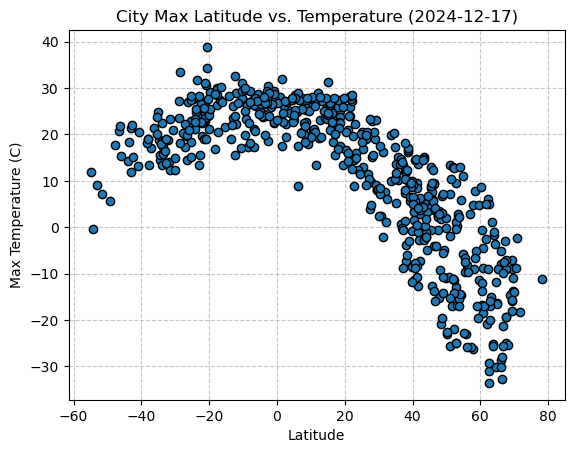

In [15]:
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

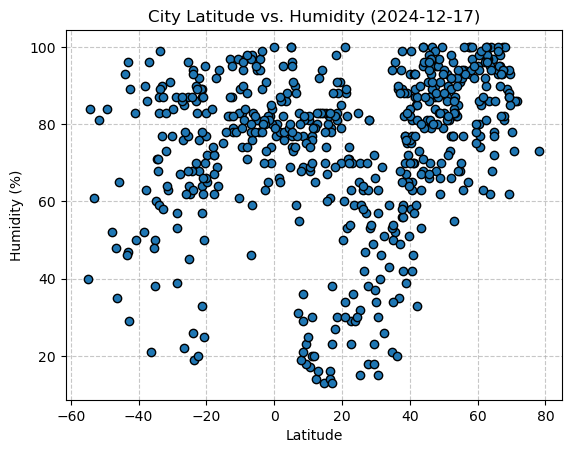

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

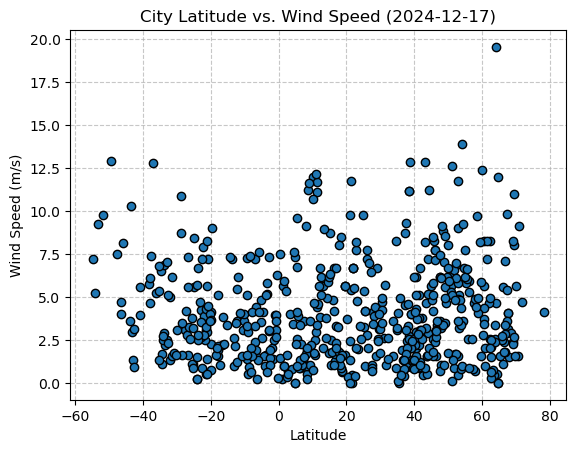

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot

#### Latitude vs. Wind Speed Plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Print the regression statistics
    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    # Create regression line values
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    # Create Plot
    plt.scatter(x, y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})")
    plt.plot(x, regress_values, "r-", label=line_eq)

    # Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)

    # Dynamic annotation positioning
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")

    # Show the legend for the regression line
    plt.legend()

    # Show plot
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,16.14,67,20,12.86,PT,1734485707
1,vorgashor,67.5833,63.9500,-24.98,100,98,3.11,RU,1734485708
2,hobyo,5.3505,48.5268,24.69,74,91,9.61,SO,1734485710
3,iqaluit,63.7506,-68.5145,-25.15,62,75,2.57,CA,1734485412
4,stanley,54.8680,-1.6985,11.01,91,75,7.72,GB,1734485631


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,blackmans bay,-43.0167,147.3167,21.40,47,0,1.34,AU,1734485713
9,grytviken,-54.2811,-36.5092,-0.46,84,20,5.23,GS,1734485718
10,mar del plata,-38.0023,-57.5575,18.94,90,0,4.63,AR,1734485310
14,carutapera,-1.1950,-46.0200,26.63,82,20,3.93,BR,1734485725
15,waitangi,-43.9535,-176.5597,14.34,93,100,3.58,NZ,1734485726


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8528496896646843 
p-value  :  2.3765700180774727e-116 
std-error:  0.02106632742093405
y = -0.69x + 31.72


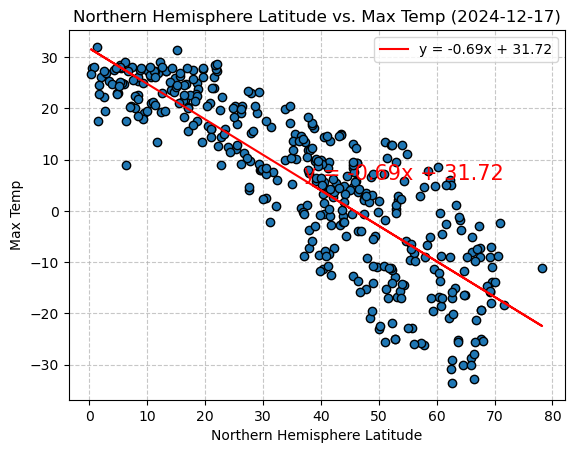

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.6075997679829859 
p-value  :  3.8479509797824505e-19 
std-error:  0.026069528016579215
y = 0.26x + 28.1


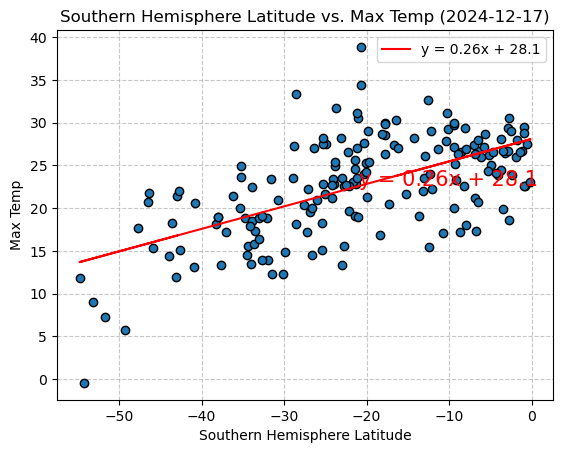

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.40066276019757846 
p-value  :  3.9878112238911453e-17 
std-error:  0.0503739166109874
y = 0.44x + 57.23


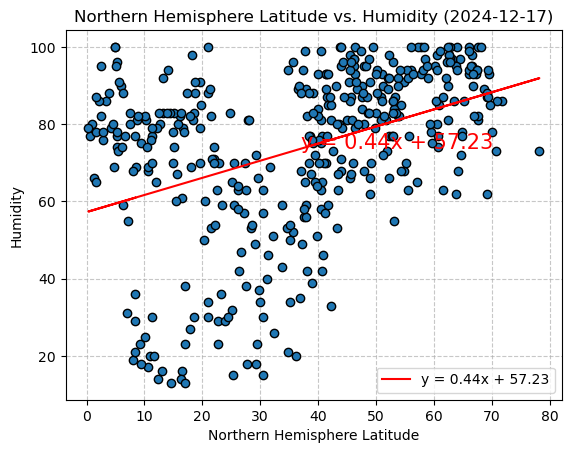

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.33366852703188477 
p-value  :  6.0268107721248266e-06 
std-error:  0.09577097209965252
y = 0.45x + 83.7


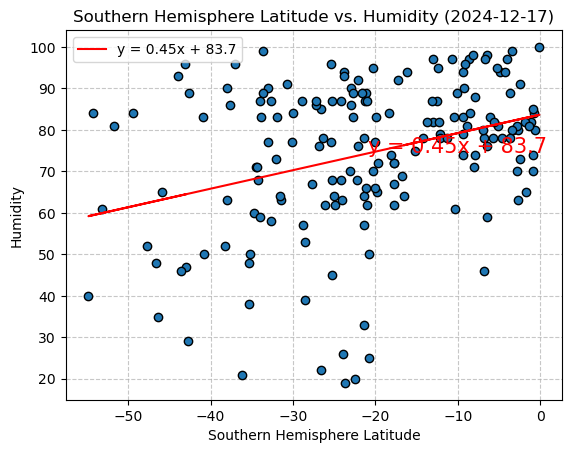

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** The two models above demonstrate significant linear relationships between their variables, as evidenced by the low p-values. By examining both linear graphs, the Northern Hemisphere plot exhibits a strong negative correlation, where an increase in the x-variable corresponds to a decrease in the y-variable. In contrast, the Southern Hemisphere plot shows a moderate positive correlation, with both the x-variable and y-variable increasing together. These results indicate opposite trends in the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.2305189185475485 
p-value  :  2.605639427828329e-06 
std-error:  0.10110814439449904
y = 0.48x + 41.86


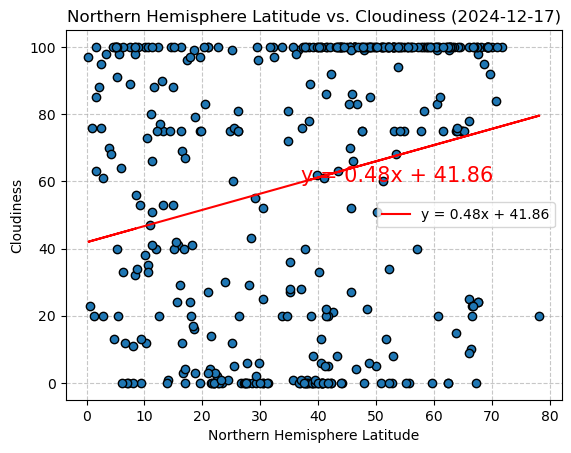

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.1997600336937565 
p-value  :  0.007858772262970942 
std-error:  0.2199195290991732
y = 0.59x + 70.34


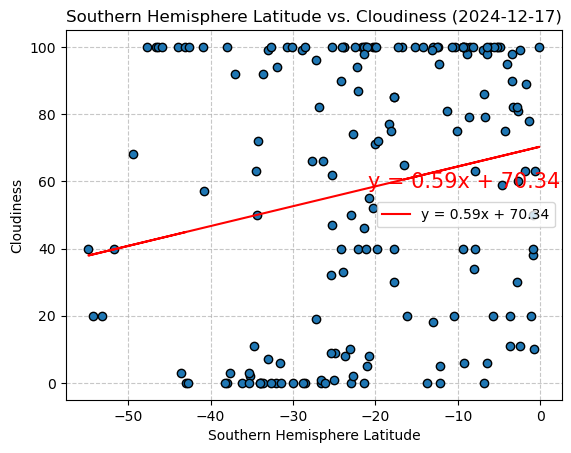

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** Plot 1 suggests a weak positive relationship between humidity and latitude in the Northern Hemisphere. In contrast, Plot 2 indicates that there is no significant correlation between humidity and latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.08346639006998975 
p-value  :  0.09264108480805759 
std-error:  0.007713713085361083
y = 0.01x + 3.59


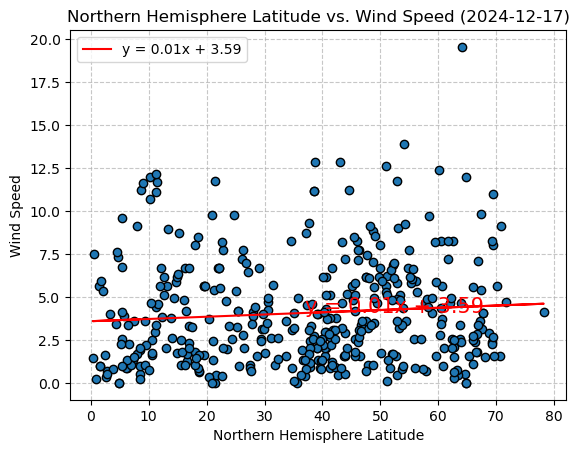

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.3230848003871435 
p-value  :  1.2225136052679375e-05 
std-error:  0.013489876763753322
y = -0.06x + 2.55


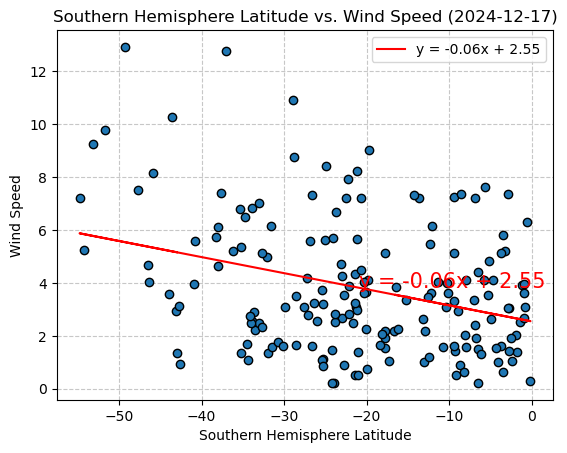

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** Plot 1 suggests that there is no significant relationship between latitude and wind speed in the Northern Hemisphere. In contrast, Plot 2 indicates a slight decrease in wind speed as latitude increases in the Southern Hemisphere. While the relationship is minimal, it is observable.